In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline

In [3]:
voice = pd.read_csv('./data/voice.csv')

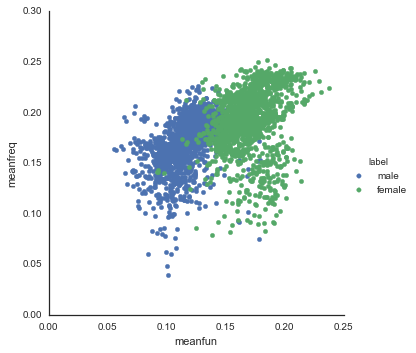

In [4]:
sns.FacetGrid(voice, hue='label', size=5).map(plt.scatter, "meanfun", "meanfreq").add_legend()

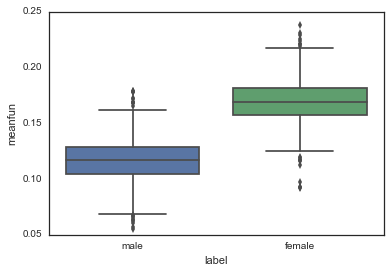

In [5]:
sns.boxplot(x="label", y="meanfun", data=voice)


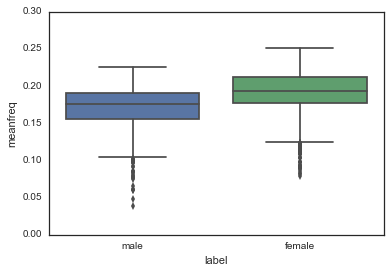

In [6]:
sns.boxplot(x="label", y="meanfreq", data=voice)

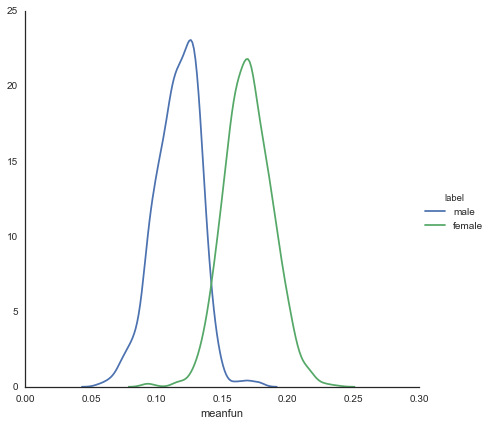

In [7]:
sns.FacetGrid(voice, hue="label", size=6).map(sns.kdeplot, "meanfun").add_legend()

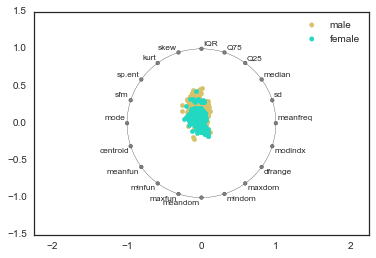

In [8]:
#Radviz circle 
#Good to compare every feature
from pandas.tools.plotting import radviz
radviz(voice, "label")
plt.show()

In [9]:
voice_array = voice.as_matrix()
voice_array = np.array(voice_array)

np.random.shuffle(voice_array)
voice_array.shape

voice_data = voice_array[:, :20]
voice_label = voice_array[:, 20]

voice_data = voice_array[:, :20]
voice_label = voice_array[:, 20]

train_data = voice_data[:3000,:]
eval_data = voice_data[3000:,:]
train_data, eval_data.shape

train_label = voice_label[:3000]
eval_label = voice_label[3000:]

train_data.shape, train_label.shape, eval_data.shape, eval_label.shape

((3000, 20), (3000,), (168, 20), (168,))

In [10]:
from sklearn.cross_validation import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, train_data, train_label)
predictor = clf.fit(train_data, train_label)
pre_label = predictor.predict(eval_data)
accuracy = predictor.score(eval_data, eval_label)
print (scores.mean())
print(accuracy)

0.961332971
0.97619047619


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(rf, train_data, train_label)
print (scores.mean())
predictor = rf.fit(train_data, train_label)
pre_label = predictor.predict(eval_data)
accuracy = predictor.score(eval_data, eval_label)
print (accuracy)

0.971664978998
0.994047619048


In [12]:
from sklearn.ensemble import ExtraTreesClassifier
ef = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(ef, train_data, train_label)
print (scores.mean())
predictor = ef.fit(train_data, train_label)
pre_label = predictor.predict(eval_data)
accuracy = predictor.score(eval_data, eval_label)
print (accuracy)

0.977664983665
0.970238095238


In [13]:
from sklearn.ensemble import AdaBoostClassifier

adaf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adaf, train_data, train_label)
print(scores.mean()) 

0.975335649002


In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
X, y = voice.iloc[:, :-1].values, voice.iloc[:,-1].values

In [23]:
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=len(X[0]))]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="tf_model")

pipe_tf = Pipeline([('std_scl', StandardScaler()), 
                    ('dnn', classifier)])

In [26]:
# Fit model.
pipe_tf.fit(X_train, y_train, dnn__steps=2000)

Pipeline(steps=[('std_scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dnn', <tensorflow.contrib.learn.python.learn.estimators.dnn.DNNClassifier object at 0x115c84410>)])

In [27]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy.
score = accuracy_score(y_test, pipe_tf.predict(X_test))
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.968454
